# Hierarchical clustering

In [2]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt # Plot library
from scipy.cluster.hierarchy import dendrogram, linkage # Clustering library
import gc

# some setting for this notebook to actually show the graphs inline
# you probably won't need this
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

from auxiliar_functions import get_sons_with_only_one_genre

In [3]:
df_songs = pd.read_csv('../Data/songs.csv')
df_songs = get_sons_with_only_one_genre(df_songs)
df_songs = df_songs.drop('lyricist',1)
df_songs = df_songs.drop('composer',1)
df_songs=df_songs.dropna(axis='index', how='any')
print(df_songs.head())

Remove less common genres that doesn't appear in test and limit categories per song to 1:
                                        song_id  song_length genre_ids  \
0  CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=       247640       465   
1  o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=       197328       444   
2  DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=       231781       465   
3  dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=       273554       465   
4  W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=       140329       726   

        artist_name  language  
0  張信哲 (Jeff Chang)       3.0  
1         BLACKPINK      31.0  
2      SUPER JUNIOR      31.0  
3             S.H.E       3.0  
4              貴族精選      52.0  


In [4]:
from sklearn.cluster import AgglomerativeClustering
print(df_songs.head())
df_songs.isnull().sum()

                                        song_id  song_length genre_ids  \
0  CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=       247640       465   
1  o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=       197328       444   
2  DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=       231781       465   
3  dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=       273554       465   
4  W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=       140329       726   

        artist_name  language  
0  張信哲 (Jeff Chang)       3.0  
1         BLACKPINK      31.0  
2      SUPER JUNIOR      31.0  
3             S.H.E       3.0  
4              貴族精選      52.0  


song_id        0
song_length    0
genre_ids      0
artist_name    0
language       0
dtype: int64

In [21]:
df_songs.to_csv('../Data/songs_no_missing.csv')

In [14]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [5]:

cluster = AgglomerativeClustering(n_clusters=5, linkage='ward')

In [ ]:
categories = ['genre_ids', 'language']

# for col in categories:
#     print(len(df_songs[col].value_counts()))
#     print(df_songs[col].value_counts())



threshold = 100
for col in categories:
    value_counts = df_songs.stack().value_counts() # Entire DataFrame 
    to_remove = value_counts[value_counts <= threshold].index
    df_songs[col].replace(to_remove, np.nan, inplace=True)

for col in categories:
    print(col, len(df_songs[col].value_counts()))
#     print(df_songs[col].value_counts())

In [6]:
sample = df_songs.sample(frac=0.02)
sample.shape

(43701, 5)

In [8]:
categories = ['genre_ids','artist_name', 'language']
Dummies_songs = pd.get_dummies(data=sample, prefix_sep='|',columns=categories)
print(Dummies_songs.head())

                                              song_id  song_length  \
1302631  /6DuxgZ0tlFo3+80n5zUHZzPZg6hk6H/5Tbz5Ik4lsQ=       218917   
1752901  ffp6RNk5tOlsH2l/XMQJmmjQyu2LSDwfNAL8PD6tp8c=       170866   
993445   LNmKItaOAsf89jWrDS2mi/pDcLqwEOuHYa6MSgI9s8g=        80805   
894517   zn/Cm0guKmsoW4Izz3/Qr4PfyXiMmvkErmfE0NTRF2Y=       143801   
883285   6doGTZOQTRRLM71kzWFxDBeLi7H/+FoJq9mTd/ZYuiE=       252447   

         genre_ids|1011  genre_ids|1019  genre_ids|1026  genre_ids|1040  \
1302631               1               0               0               0   
1752901               0               0               0               0   
993445                0               0               0               0   
894517                0               0               0               0   
883285                0               0               0               0   

         genre_ids|1047  genre_ids|1068  genre_ids|1082  genre_ids|109  \
1302631               0               0               

In [10]:
numeric = Dummies_songs.drop(columns= ['song_id'])

In [11]:
numeric.head()

,song_length,genre_ids|1011,genre_ids|1019,genre_ids|1026,genre_ids|1040,genre_ids|1047,genre_ids|1068,genre_ids|1082,genre_ids|109,genre_ids|1096,...,language|-1.0,language|3.0,language|10.0,language|17.0,language|24.0,language|31.0,language|38.0,language|45.0,language|52.0,language|59.0
1302631,218917,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1752901,170866,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
993445,80805,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
894517,143801,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
883285,252447,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [12]:
cluster = AgglomerativeClustering(n_clusters=5)
model = cluster.fit(numeric)

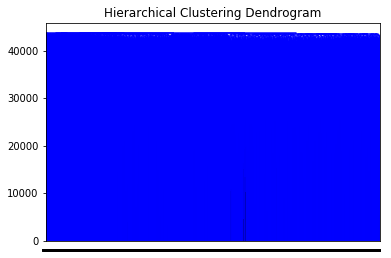

In [15]:
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, labels=model.labels_)
plt.show()

In [18]:
import pickle

filename = 'hierarchical_clustering.sav'
pickle.dump(model, open(filename, 'wb'))